<div class="alert alert-success">
<h3> Will be transated...</h3>

</div>

## Приложение для привлечения новых клиентов сервиса по продаже автомобилей с пробегом «Не бит, не крашен».
---
В исследовании рассмотрены пять моделей машинного обучения для сервиса оценки рыночной стоимости автомобиля:

- Линейная регрессия
- Решающее дерево
- Случайный лес
- LightGBM
- CatBoost

Качество работы моделей оценивалось метрикой RMSE. Модели сравнивались также по скорости прдсказания и времени обучения. 

---
#### Описание данных
Признаки:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак:
- Price — цена (евро)

---
<a id='the_contents'></a>
#### Исследование состоит из 4 частей.

##### Часть 1. Подготовка данных.
* [1.1 Импорт библиотек.](#the_part_1.1)
* [1.2 Загрузка файла.](#the_part_1.2)
* [1.3 Изучение общей информации.](#the_part_1.3)
* [1.4 Заполнение пропущенных значений и удаление дубликатов.](#the_part_1.4)
* [1.5 Удаление лишних, заполнение, обработка данных.](#the_part_1.5)
* [1.6 Обработка категориальных признаков.](#the_part_1.6)
* [1.7 Разделение данных на обучающую и валидационную выборки.](#the_part_1.7)
* [1.8 Стандартизация данных.](#the_part_1.8)

##### Часть 2. Обучение моделей.
* [2.1 Линейная регрессия.](#the_part_2.1)
* [2.2 Решающее дерево.](#the_part_2.2)
* [2.3 Случайный лес.](#the_part_2.3)
* [2.4 LightGBM.](#the_part_2.4)
* [2.5 CatBoost.](#the_part_2.5)

##### Часть 3. Анализ моделей.
* [3.1. Сравнение результатов работы моделей.](#the_part_3.1)

##### Часть 4. Заключение.
* [Выводы по исследованию.](#the_part_4)
---

# 1. Подготовка данных

<a id='the_part_1.1'></a>
### 1.1 Импорт библиотек.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression

import lightgbm as lgb
from catboost import CatBoostRegressor
import gc

In [2]:
# Отключаем уведомления
pd.options.mode.chained_assignment = None  # default='warn'

<a id='the_part_1.2'></a>
### 1.2 Загрузка файла.

In [3]:
# Загружаем файл данных
try:
    df_car = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект8\autos.csv')
except:
    df_car = pd.read_csv('https://С:/datasets/autos.csv')

<a id='the_part_1.3'></a>
### 1.3 Изучение общей информации.

In [4]:
# Выводим обзорную информацию
display(df_car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

In [5]:
# Смотрим на датафрейм
display(df_car.head(3))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [6]:
# Смотрим статистические характеристики количественных переменных
display(df_car.describe().T)

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


#### Построим распределения значений  признаков `RegistrationYear`,  `Power`, `Kilometer` и целевого признака `Price`.

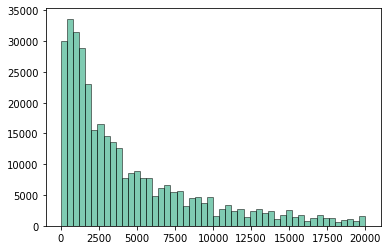

In [7]:
# Строим гистограмму распределения
plt.hist(df_car['Price'], color = '#009966', alpha=0.5, edgecolor='black',  bins = 50)
plt.show()

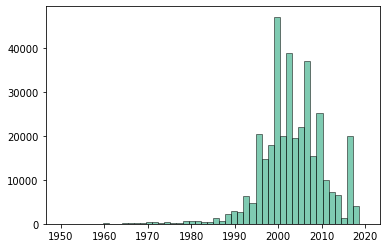

In [8]:
# Строим гистограмму распределения
plt.hist(df_car['RegistrationYear'], color = '#009966', alpha=0.5, edgecolor='black',  bins = 50, range=(1950, 2020))
plt.show()

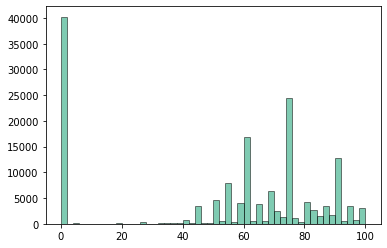

In [9]:
# Строим гистограмму распределения
plt.hist(df_car['Power'], color = '#009966', alpha=0.5, edgecolor='black',  bins = 50, range=(0, 100))
plt.show()

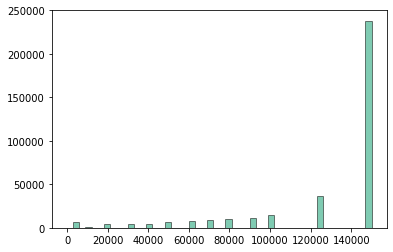

In [10]:
# Строим гистограмму распределения
plt.hist(df_car['Kilometer'], color = '#009966', alpha=0.5, edgecolor='black',  bins = 50, range=(0, 150000))
plt.show()

<a id='the_part_1.4'></a>
### 1.4 Заполнение пропущенных значений и удаление дубликатов.

In [11]:
# Определим функцию анализа пропущенных данных
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total missing data', 'Percent missing data'])

# Поиск пропущенных данных
display(missing_data(df_car)) 

# Поиск дубликатов
print('Дубликаты:', df_car.duplicated().sum())

,Total missing data,Percent missing data
NotRepaired,71154,20.079070
VehicleType,37490,10.579368
FuelType,32895,9.282697
Gearbox,19833,5.596709
Model,19705,5.560588
LastSeen,0,0.000000
PostalCode,0,0.000000
NumberOfPictures,0,0.000000
DateCreated,0,0.000000
Brand,0,0.000000


Дубликаты: 4


#### Удилим найденные дубликаты

In [12]:
# Удаляем дубликаты
df_car = df_car.drop_duplicates().reset_index(drop=True)

#### Заполним пропущенные значения категориальных признаков категорией "unk" и удалим объекты с неизвестными моделями - их количество невелико (около 5%), а восстановить модель довольно сложно.

In [13]:
# Заполняем пропущенные значения на категорию "unknown"
col_unk = ['NotRepaired', 'VehicleType', 'FuelType', 'Gearbox']
df_car[col_unk] = df_car[col_unk].fillna(value='unk')

# Удаляем строки с неизвестными моделями
df_car.dropna(subset=['Model'], inplace=True)

<a id='the_part_1.5'></a>
### 1.5 Удаление лишних, заполнение, обработка данных.

#### Оставим только первый знак в почтовом коде, в этом случае корреляция с целевым признаком получается выше.

In [14]:
# Оставим первый знак в признаке 'PostalCode'
df_car['PostalCode'] = df_car['PostalCode']//10000

#### Построим корреляции признаков

In [15]:
# Посмотрим на коррлеляции в табличном виде
df_car.corr()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.040065,0.160064,-0.353935,0.098375,NaN,0.079228
RegistrationYear,0.040065,1.000000,0.002366,-0.054546,-0.008222,NaN,-0.001684
Power,0.160064,0.002366,1.000000,0.021564,0.037870,NaN,0.020806
Kilometer,-0.353935,-0.054546,0.021564,1.000000,-0.000831,NaN,-0.012918
RegistrationMonth,0.098375,-0.008222,0.037870,-0.000831,1.000000,NaN,0.014373
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.079228,-0.001684,0.020806,-0.012918,0.014373,NaN,1.000000


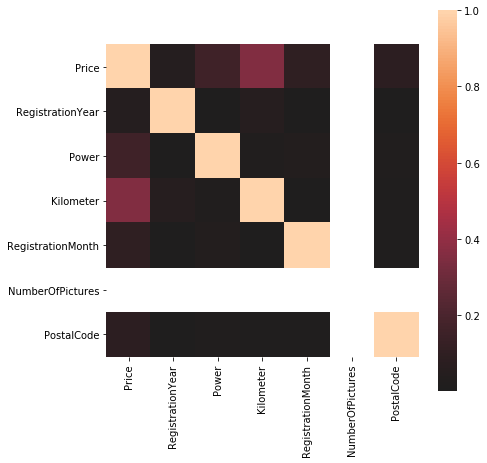

In [16]:
# Посмотрим на коррлеляции в графическом виде
plt.subplots(figsize=(7,7))
sns.heatmap(abs(df_car.corr()), center = 0 , square=True)
plt.show()

#### Удалим бесполезные для обучения моделей признаки 'DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen', удалим некорректные значения признака 'RegistrationYear' и заполним нулевые значения признака 'Power' медианным значением.

In [17]:
# Удаляем столбцы с бесполезной для обучения моделей информацией
del_col = ['DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen']
df_car.drop(del_col, axis=1, inplace=True)

In [18]:
# Удаляем выбросы
df_car = df_car[(df_car['RegistrationYear'] > 1940) & (df_car['RegistrationYear'] < 2021)]

In [19]:
# Заполняем нулевые значения мощности медианой по выборке
df_car.loc[(df_car['Power'] < 40), 'Power'] = df_car['Power'].median()

<a id='the_part_1.6'></a>
### 1.6 Обработка категориальных признаков.

#### Сохраним датафрейм с исходными категориальными признаками.

In [20]:
df_car_cat = df_car.copy()

#### Закодируем категориальные признаки с небольшим количеством категорий техникой One-Hot Encoding, а признак 'Model' техникой Ordinal Encoding.

In [21]:
# Применяем технику One-Hot Encoding
df_car = pd.get_dummies(df_car, columns=['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'NotRepaired'], drop_first=True)

In [22]:
# Применяем технику Ordinal Encoding
df_car['Model'] = df_car['Model'].astype(str)
encoder = OrdinalEncoder() 
df_car['Model'] = encoder.fit_transform(df_car[['Model']])

<a id='the_part_1.7'></a>
### 1.7 Разделение данных на обучающую и валидационную выборки.

#### Разделим данные на обучающую-тестовую выборки в соотношении 75% / 25%.

In [23]:
# Выделяем признаки из набора данных
features = df_car.drop('Price', axis=1)
# Выделяем целевой признак
target = df_car['Price']

# Делим данные на обучающую-валидационную-тестовую выборки в соотношении 75%-25%
features_train, features_test, target_train, target_test = train_test_split(
                                                            features, target, test_size=0.25, random_state=123)

In [24]:
# Приведем значения признака 'Model' к целочисленному типу
features_train['Model'] = features_train['Model'].astype('int')
features_test['Model'] = features_test['Model'].astype('int')

In [25]:
# Посмотрим на результат
features_train

,RegistrationYear,Power,Model,Kilometer,RegistrationMonth,PostalCode,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_unk,NotRepaired_yes
154843,2011,143.0,6,100000,5,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
85736,1995,105.0,116,150000,0,4,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
285741,2008,91.0,206,150000,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57104,2003,220.0,29,150000,3,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272481,2014,120.0,166,30000,8,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204000,2006,75.0,105,125000,1,7,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18734,2010,150.0,236,150000,4,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29698,2002,131.0,116,150000,8,8,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
294469,2000,54.0,83,125000,4,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='the_part_1.8'></a>
### 1.8 Стандартизация данных.

#### Выполним стандартизацию количественных признаков, содержащих большие величины.

In [26]:
# Стобцы с количественными данными для стандартизации 
numeric = ['RegistrationYear', 'Power', 'Kilometer']

# Выполнение стандартизации
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

[<span style="color:green"> К оглавлению</span>](#the_contents)

# 2. Обучение моделей

<a id='the_part_2.1'></a>
### 2.1 Линейная регрессия.

In [27]:
# Создаем генератор псевдослучайных чисел
rstate = np.random.RandomState(123)

In [28]:
%%time
# Обучаем
model_lm = LinearRegression()
model_lm.fit(features_train, target_train)

Wall time: 879 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
%%time
# Предсказываем
predict_lm = model_lm.predict(features_test)

Wall time: 53.1 ms


In [30]:
# Вычисление RMSE
print('RMSE: {:.2f}'.format(mean_squared_error(target_test, predict_lm) ** 0.5))

RMSE: 2999.87


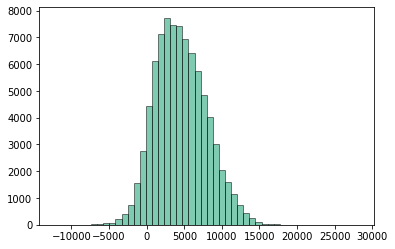

In [31]:
# Строим гистограмму распределения предсказанных значений
plt.hist(predict_lm, color = '#009966', alpha=0.5, edgecolor='black',  bins = 50)
plt.show()

Распределение предсказаний отличается от распределения значений целевого признака.

[<span style="color:green"> К оглавлению</span>](#the_contents)

<a id='the_part_2.2'></a>
### 2.2 Решающее дерево.

In [32]:
%%time
# Подбираем гиперпараметры
model_dtr = DecisionTreeRegressor(random_state=rstate)
param_grid={'max_depth': range(10, 17, 2)}
gs = GridSearchCV(model_dtr, param_grid, scoring='neg_mean_squared_error', cv=4)
gs.fit(features_train, target_train)
print('Лучшие параметры:', gs.best_params_)
print('Параметры:', gs.cv_results_['params'])
print('Результаты:', abs(gs.cv_results_['mean_test_score']))

Лучшие параметры: {'max_depth': 14}
Параметры: [{'max_depth': 10}, {'max_depth': 12}, {'max_depth': 14}, {'max_depth': 16}]
Результаты: [4479913.73043832 4228255.67816414 4183001.24129906 4295688.91330423]
Wall time: 55 s


In [33]:
%%time
# Обучаем с лучшими гиперпараметрами
model_dtr = DecisionTreeRegressor(random_state=rstate, max_depth=14)
model_dtr.fit(features_train, target_train)

Wall time: 4.88 s


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x1A7997C8D08,
                      splitter='best')

In [34]:
%%time
# Предсказываем
predict_dtr = model_dtr.predict(features_test)

Wall time: 107 ms


In [35]:
# Вычисление RMSE
print('RMSE: {:.2f}'.format(mean_squared_error(target_test, predict_dtr) ** 0.5))

RMSE: 2017.21


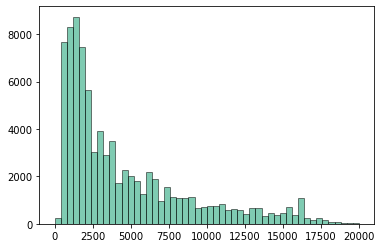

In [36]:
# Строим распределение
plt.hist(predict_dtr, color = '#009966', alpha=0.5, edgecolor='black',  bins = 50)
plt.show()

Распределение предсказаний близко к распределению значений целевого признака.

[<span style="color:green"> К оглавлению</span>](#the_contents)

<a id='the_part_2.3'></a>
### 2.3 Случайный лес.

In [37]:
%%time
# Обучаем с лучшими гиперпараметрами
model_rfr = RandomForestRegressor(random_state=rstate, n_estimators=90, max_depth=30)
model_rfr.fit(features_train, target_train)

Wall time: 5min 21s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=RandomState(MT19937) at 0x1A7997C8D08,
                      verbose=0, warm_start=False)

In [38]:
%%time
# Предсказываем
predict_rfr = model_rfr.predict(features_test)

Wall time: 6.18 s


In [39]:
# Вычисление RMSE
print('RMSE: {:.2f}'.format(mean_squared_error(target_test, predict_rfr) ** 0.5))

RMSE: 1696.21


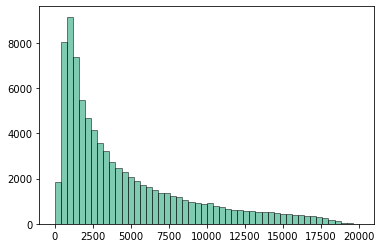

In [40]:
# Строим распределение
plt.hist(predict_rfr, color = '#009966', alpha=0.5, edgecolor='black',  bins = 50)
plt.show()

Распределение предсказаний близко к распределению значений целевого признака.

[<span style="color:green"> К оглавлению</span>](#the_contents)

<a id='the_part_2.4'></a>
### 2.4 LightGBM.

#### Подготовим датасет для моделей градиентного бустинга, с учетом их работы с категориальными признаками.

In [41]:
# Освободим память от неиспользуемых данных
del df_car
gc.collect()

21564

In [42]:
# Список категориальных признаков
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [43]:
# Приведем категориальные переменные к типу 'category'
df_car_cat[cat_features] = df_car_cat[cat_features].astype('category')

In [44]:
# Посмотрим результат
df_car_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334489 entries, 0 to 354364
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Price              334489 non-null  int64   
 1   VehicleType        334489 non-null  category
 2   RegistrationYear   334489 non-null  int64   
 3   Gearbox            334489 non-null  category
 4   Power              334489 non-null  float64 
 5   Model              334489 non-null  category
 6   Kilometer          334489 non-null  int64   
 7   RegistrationMonth  334489 non-null  int64   
 8   FuelType           334489 non-null  category
 9   Brand              334489 non-null  category
 10  NotRepaired        334489 non-null  category
 11  PostalCode         334489 non-null  int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 20.1 MB


#### Разделим данные на обучающую-тестовую выборки в соотношении 75% / 25%.

In [45]:
# Выделяем признаки из набора данных
features = df_car_cat.drop('Price', axis=1)
# Выделяем целевой признак
target = df_car_cat['Price']

# Делим данные на обучающую-валидационную-тестовую выборки в соотношении 75%-25%
features_train, features_test, target_train, target_test = train_test_split(
                                                            features, target, test_size=0.25, random_state=123)

#### Выполним стандартизацию количественных признаков, содержащих большие величины.

In [46]:
# Стобцы с количественными данными для стандартизации 
numeric = ['RegistrationYear', 'Power', 'Kilometer']

# Выполнение стандартизации
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

In [47]:
%%time
# Удаляем лишние данные
try:
    del features, target
    gc.collect()
except:
    True
    
# Определяем словарь параметров
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Определяем параметры модели
model_lgb = lgb.LGBMRegressor(boosting_type = params['boosting_type'],
                                objective = params['objective'],
                                metric = params['metric'],
                                feature_fraction = params['feature_fraction'],
                                bagging_fraction = params['bagging_fraction'],
                                bagging_freq = params['bagging_freq'])

# Определяем словарь для подбора гиперпараметров
param_grid={'n_estimators': [90, 100],
            'max_depth': [10, 30], 
            'learning_rate': [0.07, 0.09],
            'num_leaves': [31, 62]}

# Подбираем гиперпараметры
gs = GridSearchCV(model_lgb, param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)
gs.fit(features_train, target_train)
display(gs.best_params_)
display(gs.best_score_)
display(gs.cv_results_['params'], abs(gs.cv_results_['mean_test_score']))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  1.8min finished


{'learning_rate': 0.09, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 62}

-2908114.602834314

[{'learning_rate': 0.07,
  'max_depth': 10,
  'n_estimators': 90,
  'num_leaves': 31},
 {'learning_rate': 0.07,
  'max_depth': 10,
  'n_estimators': 90,
  'num_leaves': 62},
 {'learning_rate': 0.07,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 31},
 {'learning_rate': 0.07,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 62},
 {'learning_rate': 0.07,
  'max_depth': 30,
  'n_estimators': 90,
  'num_leaves': 31},
 {'learning_rate': 0.07,
  'max_depth': 30,
  'n_estimators': 90,
  'num_leaves': 62},
 {'learning_rate': 0.07,
  'max_depth': 30,
  'n_estimators': 100,
  'num_leaves': 31},
 {'learning_rate': 0.07,
  'max_depth': 30,
  'n_estimators': 100,
  'num_leaves': 62},
 {'learning_rate': 0.09,
  'max_depth': 10,
  'n_estimators': 90,
  'num_leaves': 31},
 {'learning_rate': 0.09,
  'max_depth': 10,
  'n_estimators': 90,
  'num_leaves': 62},
 {'learning_rate': 0.09,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 31},
 {'learning_rate': 0.09,
  'max_depth'

array([3128546.27823114, 2974754.47195576, 3098977.00939849,
       2953259.50265373, 3129994.07806562, 2966257.79774459,
       3101071.24663893, 2945842.30027335, 3062660.25736946,
       2933639.76986717, 3039621.69927664, 2916590.81347672,
       3059924.15325091, 2925309.38537866, 3035419.76026426,
       2908114.60283431])

Wall time: 1min 50s


In [48]:
# Сохраняем лучшие параметры
params['n_estimators'] = gs.best_params_['n_estimators']
params['max_depth'] = gs.best_params_['max_depth']
params['learning_rate'] = gs.best_params_['learning_rate']
params['num_leaves'] = gs.best_params_['num_leaves']

In [49]:
%%time
# Создаем датасет lightGBM
y_train = target_train
y_test = target_test
X_train = features_train
X_test = features_test

# В датасете указвыаем категориальные переменные
d_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
d_valid = lgb.Dataset(X_test, y_test, categorical_feature=cat_features)
watchlist = [d_train, d_valid]

# Обучаем с лучшими гиперпараметрами
gbm = lgb.train(params,
                train_set=d_train,
                num_boost_round=20,
                valid_sets=watchlist,
                early_stopping_rounds=5, 
                verbose_eval=4)

C:\Users\iserg\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\iserg\anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 5 rounds
[4]	training's rmse: 3497.81	valid_1's rmse: 3517.48
[8]	training's rmse: 2837.73	valid_1's rmse: 2865.06
[12]	training's rmse: 2427.36	valid_1's rmse: 2459.93
[16]	training's rmse: 2168.8	valid_1's rmse: 2207.7
[20]	training's rmse: 2009.6	valid_1's rmse: 2053.25
[24]	training's rmse: 1908.57	valid_1's rmse: 1957.23
[28]	training's rmse: 1842.86	valid_1's rmse: 1894.78
[32]	training's rmse: 1798.3	valid_1's rmse: 1853.87
[36]	training's rmse: 1766.22	valid_1's rmse: 1825.27
[40]	training's rmse: 1743.53	valid_1's rmse: 1805.67
[44]	training's rmse: 1723.86	valid_1's rmse: 1790.51
[48]	training's rmse: 1708.78	valid_1's rmse: 1778.76
[52]	training's rmse: 1696.92	valid_1's rmse: 1769.86
[56]	training's rmse: 1687.07	valid_1's rmse: 1763.02
[60]	training's rmse: 1678.89	valid_1's rmse: 1757.21
[64]	training's rmse: 1670.05	valid_1's rmse: 1751.61
[68]	training's rmse: 1663.71	valid_1's rmse: 1748.14
[72]	training's rmse: 1657.1

In [50]:
%%time
# Предсказыавем
predict_lgbm = gbm.predict(X_test, num_iteration=gbm.best_iteration)

Wall time: 280 ms


In [51]:
# Вычисление RMSE
print('RMSE: {:.2f}'.format(mean_squared_error(target_test, predict_lgbm) ** 0.5))

RMSE: 1724.68


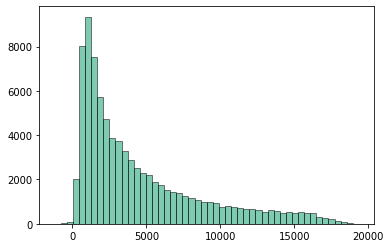

In [52]:
# Строим распределение
plt.hist(predict_lgbm, color = '#009966', alpha=0.5, edgecolor='black',  bins = 50)
plt.show()

Распределение предсказаний близко к распределению значений целевого признака.

[<span style="color:green"> К оглавлению</span>](#the_contents)

<a id='the_part_2.5'></a>
### 2.5 CatBoost.

In [53]:
%%time
# Создаем модель
model_cbr = CatBoostRegressor()

# Определяем словарь для подбора гиперпараметров
param_grid={'depth'     : [12, 14],
            'iterations': [50, 150]}

# Подбираем гиперпараметры
gs = GridSearchCV(estimator=model_cbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4)
gs.fit(features_train, target_train, cat_features=cat_features)

Learning rate set to 0.5
0:	learn: 3091.7728946	total: 359ms	remaining: 17.6s
1:	learn: 2467.7582584	total: 553ms	remaining: 13.3s
2:	learn: 2160.0793647	total: 721ms	remaining: 11.3s
3:	learn: 2007.6544953	total: 871ms	remaining: 10s
4:	learn: 1918.9141683	total: 1.04s	remaining: 9.33s
5:	learn: 1870.6797116	total: 1.21s	remaining: 8.85s
6:	learn: 1844.1824244	total: 1.36s	remaining: 8.34s
7:	learn: 1821.9379522	total: 1.5s	remaining: 7.9s
8:	learn: 1801.2331966	total: 1.66s	remaining: 7.55s
9:	learn: 1786.6648885	total: 1.81s	remaining: 7.23s
10:	learn: 1766.8145321	total: 1.97s	remaining: 6.97s
11:	learn: 1753.2421014	total: 2.12s	remaining: 6.71s
12:	learn: 1740.8471637	total: 2.27s	remaining: 6.45s
13:	learn: 1730.9328010	total: 2.42s	remaining: 6.23s
14:	learn: 1721.4535501	total: 2.57s	remaining: 6s
15:	learn: 1713.0276094	total: 2.72s	remaining: 5.79s
16:	learn: 1695.3428486	total: 2.88s	remaining: 5.59s
17:	learn: 1688.4360882	total: 3.04s	remaining: 5.4s
18:	learn: 1680.58553

GridSearchCV(cv=4, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001A79A4689C8>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [12, 14], 'iterations': [50, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [54]:
# Смотрим результаты подбора гиперпараметров
display(gs.best_params_)
display(gs.best_estimator_)        
display(gs.cv_results_['params'], abs(gs.cv_results_['mean_test_score']))

{'depth': 12, 'iterations': 150}

[{'depth': 12, 'iterations': 50},
 {'depth': 12, 'iterations': 150},
 {'depth': 14, 'iterations': 50},
 {'depth': 14, 'iterations': 150}]

array([3014068.92365873, 2935935.20820301, 3050944.14202703,
       2987072.00356828])

In [55]:
%%time
# Обучаем с лучшими гиперпараметрами
model_cbr = CatBoostRegressor(depth=12, iterations=150, learning_rate=0.1)
model_cbr.fit(features_train, target_train, cat_features=cat_features)

0:	learn: 4209.9738540	total: 260ms	remaining: 38.7s
1:	learn: 3929.9226294	total: 398ms	remaining: 29.4s
2:	learn: 3685.6939105	total: 570ms	remaining: 27.9s
3:	learn: 3465.1286991	total: 737ms	remaining: 26.9s
4:	learn: 3275.3362505	total: 908ms	remaining: 26.3s
5:	learn: 3107.7480490	total: 1.08s	remaining: 26s
6:	learn: 2960.8905318	total: 1.24s	remaining: 25.4s
7:	learn: 2834.2786722	total: 1.39s	remaining: 24.7s
8:	learn: 2723.6741743	total: 1.54s	remaining: 24.2s
9:	learn: 2630.0663259	total: 1.7s	remaining: 23.7s
10:	learn: 2547.2764380	total: 1.86s	remaining: 23.5s
11:	learn: 2461.8825615	total: 2.02s	remaining: 23.2s
12:	learn: 2390.2565944	total: 2.17s	remaining: 22.9s
13:	learn: 2327.4332642	total: 2.33s	remaining: 22.6s
14:	learn: 2272.9083022	total: 2.48s	remaining: 22.3s
15:	learn: 2226.7008572	total: 2.63s	remaining: 22.1s
16:	learn: 2187.1012065	total: 2.79s	remaining: 21.9s
17:	learn: 2143.5045507	total: 2.95s	remaining: 21.6s
18:	learn: 2107.6484501	total: 3.1s	remai

In [56]:
%%time
# Предсказываем
predict_cbr = model_cbr.predict(features_test)

Wall time: 183 ms


In [57]:
# Вычисление RMSE
print('RMSE: {:.2f}'.format(mean_squared_error(target_test, predict_cbr) ** 0.5))

RMSE: 1741.69


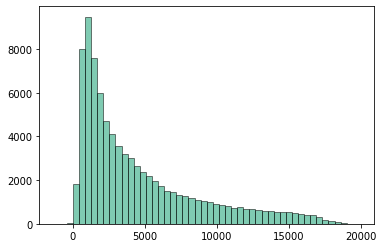

In [58]:
# Строим распределение
plt.hist(predict_cbr, color = '#009966', alpha=0.5, edgecolor='black',  bins = 50)
plt.show()

Распределение предсказаний близко к распределению значений целевого признака.

[<span style="color:green"> К оглавлению</span>](#the_contents)

# 3. Анализ моделей

<a id='the_part_3.1'></a>
### 3.1 Сравнение результатов работы моделей.

Сравнительная таблица:

| Модель| Качество предсказания, RMSE | Время обучения, с | Скорость предсказания, с |
| --- | --- | --- | --- |
| Линейная регрессия | 2999 | 0,89 | 0,05 |
| Решающее дерево | 2017 | 4,9 | 0,1 |
| Случайный лес | 1696 | 321 | 6,18 |
| LightGBM | 1724 | 2,2 | 0,28 |
| CatBoost | 1741 | 25,8 | 0,18 |

#### Выводы
- Качество предсказания простых моделей иногда лучше моделей градиентного бустинга.
- Модель случайного леса показала лучшее качество предсказания с результатом RMSE = 1696. При этом время обучения примерно на 2 порядка больше, чем у остальных моделей. Время предсказания также в десятки больше остальных моделей.
- Модель линейной регрессии самая быстрая, но при этом показалу худший результат RMSE = 2999.
- Модель LightGBM показала третий по точности результат RMSE = 1724, при этом она весьма быстро обучилась, за 2,2 с и довольно быстро выдала результат предсказаний, за 0,28 с.
- Модель CatBoost показала второй по точности результат RMSE = 1741, при этом обучалась дольше LightGBM в 11 раз - 25,8 с, однако скорость предсказаний довольно хорошая 0,18 с.

[<span style="color:green"> К оглавлению</span>](#the_contents)

## 4. Заключение

<a id='the_part_4'></a>
### Выводы по исследованию.

1. В исследовании рассмотрены пять моделей:


- Линейная регрессия
- Решающее дерево
- Случайный лес
- LightGBM
- CatBoost


2. Распределение предсказанных значений линейной регрессии близко к нормальному, в то время, как целевой признак имеет распределение Пуассона. Предсказания остальных моделей также близко к распределению Пуассона. 
3. Время подбора гиперпараметров может быть очень большим, в зависимости от количества и типа варьируемых параметров, а также от типа модели.
4. Модели градиентного бустинга способны давать хорошее качество предсказаний и в целом обладают неплохой скоростью работы.

[<span style="color:green"> К оглавлению</span>](#the_contents)

In [59]:
import gc

gc.collect()

11067